In [1]:
# Rather than importing everything manually, we'll make things easy
#   and load them all in utils.py, and just import them from there.
%matplotlib inline
import utils; reload(utils)
from utils import *

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


In [2]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data

In [3]:
x = random((30,2))
y = np.dot(x, [2., 3.]) + 1.

In [4]:
x[:5]

array([[ 0.494 ,  0.6636],
       [ 0.1571,  0.6142],
       [ 0.1913,  0.6461],
       [ 0.7745,  0.6814],
       [ 0.8303,  0.6591]])

In [5]:
y[:5]

array([ 3.9789,  3.1568,  3.3211,  4.5931,  4.6377])

In [6]:
lm = Sequential([ Dense(1, input_shape=(2,)) ])
lm.compile(optimizer=SGD(lr=0.1), loss='mse')

In [7]:
lm.evaluate(x, y, verbose=0)

14.54727840423584

In [8]:
lm.fit(x, y, nb_epoch=5, batch_size=1)

Epoch 1/5
30/30 [==============================] - 0s - loss: 1.3193      
Epoch 2/5
30/30 [==============================] - 0s - loss: 0.0885     
Epoch 3/5
30/30 [==============================] - 0s - loss: 0.0337     
Epoch 4/5
30/30 [==============================] - 0s - loss: 0.0135         
Epoch 5/5
30/30 [==============================] - 0s - loss: 0.0050     


In [9]:
lm.evaluate(x, y, verbose=0)

0.0027232060674577951

In [10]:
lm.get_weights()

[array([[ 1.9239],
        [ 2.8531]], dtype=float32), array([ 1.1179], dtype=float32)]

In [11]:
sample = True
if sample:
    path = "data_sample/"
else: 
    path = "data/"
    
model_path = 'models/'

if not os.path.exists(model_path): os.mkdir(model_path)
if not os.path.exists(path): os.mkdir(path)

In [12]:
batch_size = 100

In [13]:
from vgg16 import Vgg16

vgg = Vgg16()
model = vgg.model

In [14]:
val_batches = get_batches(path+'valid', shuffle=False, batch_size=1)
trn_batches = get_batches(path+'train', shuffle=False, batch_size=1)

Found 1591 images belonging to 2 classes.
Found 4677 images belonging to 2 classes.


In [15]:
import bcolz
def save_array(fname, arr): c = bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): bcolz.open(fname)[:]

In [17]:
val_data = get_data(path+'valid')
trn_data = get_data(path+'train')

Found 1591 images belonging to 2 classes.
Found 4677 images belonging to 2 classes.


In [18]:
trn_data.shape

(4677, 3, 224, 224)

In [19]:
save_array(model_path+'trn_data.bc', trn_data)
save_array(model_path+'val_data.bc', val_data)

In [20]:
val_data.shape

(1591, 3, 224, 224)

In [33]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1, 1)).todense())

In [36]:
onehot(np.array([1,7,12,6]))

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.]])

In [27]:
val_classes = val_batches.classes
trn_classes = trn_batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [38]:
trn_labels.shape

(4677, 2)

In [39]:
trn_classes[:4]

array([0, 0, 0, 0], dtype=int32)

In [40]:
trn_features = model.predict(trn_data, batch_size=batch_size)
val_features = model.predict(val_data, batch_size=batch_size)

In [41]:
trn_features[:5]

array([[  2.0312e-08,   1.6761e-07,   2.9735e-08, ...,   4.3991e-09,   2.6807e-06,   2.4513e-04],
       [  6.0731e-08,   1.5555e-06,   2.9544e-08, ...,   2.1520e-08,   1.9501e-05,   2.4304e-05],
       [  1.4811e-04,   2.7471e-03,   1.8223e-04, ...,   1.5689e-04,   2.3313e-04,   2.4497e-04],
       [  1.5690e-06,   7.3038e-07,   1.8134e-05, ...,   4.6603e-08,   6.5014e-05,   1.1077e-02],
       [  2.6426e-07,   8.7468e-07,   3.9610e-07, ...,   2.8086e-07,   4.5566e-04,   1.0225e-04]], dtype=float32)

In [44]:
trn_data[:1]

array([[[[  83.,   82.,   84., ...,  186.,  236.,  159.],
         [  79.,   79.,   80., ...,  187.,  237.,  163.],
         [  83.,   82.,   84., ...,  190.,  238.,  169.],
         ..., 
         [  91.,   92.,   95., ...,  189.,  193.,  223.],
         [  90.,   91.,   94., ...,  197.,  176.,  206.],
         [  97.,   96.,   95., ...,  200.,  177.,  191.]],

        [[  87.,   86.,   88., ...,  200.,  250.,  162.],
         [  83.,   83.,   84., ...,  201.,  251.,  166.],
         [  87.,   86.,   88., ...,  204.,  252.,  172.],
         ..., 
         [  92.,   93.,   94., ...,  180.,  183.,  220.],
         [  89.,   90.,   91., ...,  188.,  166.,  203.],
         [  96.,   93.,   92., ...,  191.,  167.,  187.]],

        [[  72.,   71.,   73., ...,  200.,  250.,  171.],
         [  68.,   68.,   69., ...,  201.,  251.,  175.],
         [  73.,   72.,   74., ...,  204.,  252.,  181.],
         ..., 
         [  74.,   75.,   76., ...,  173.,  174.,  205.],
         [  71.,   72.,

In [49]:
lm = Sequential([Dense(2, activation='softmax', input_shape=(1000,))])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
batch_size=64

In [51]:
batch_size=4

In [52]:
lm.fit(trn_features, trn_labels, nb_epoch=3, batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 4677 samples, validate on 1591 samples
Epoch 1/3
4677/4677 [==============================] - 1s - loss: 0.1156 - acc: 0.9660 - val_loss: 0.1133 - val_acc: 0.9736
Epoch 2/3
4677/4677 [==============================] - 1s - loss: 0.1122 - acc: 0.9739 - val_loss: 0.1274 - val_acc: 0.9723
Epoch 3/3
4677/4677 [==============================] - 1s - loss: 0.1243 - acc: 0.9748 - val_loss: 0.1387 - val_acc: 0.9730


In [53]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_8 (Dense)                  (None, 2)             2002        dense_input_4[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


In [73]:
preds = lm.predict_classes(val_features, batch_size=batch_size)

1260/1591 [======================>.......] - ETA: 0s

In [157]:
probs = lm.predict_proba(val_features, batch_size=batch_size)[:, 0]

1224/1591 [======================>.......] - ETA: 0s

In [158]:
probs[:100]

array([ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  0.1338,
        1.    ,  1.    ,  0.7092,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        0.9989,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        0.0053,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  0.9997,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  0.9999,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  0.9999,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ], dtype=float32)

In [159]:
preds[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [160]:
filenames = val_batches.filenames
n_view = 4

In [161]:
correct = np.where(preds == val_labels[:,1])[0]

In [162]:
np.where(preds == val_labels[:,1])

(array([   0,    1,    2, ..., 1588, 1589, 1590]),)

In [163]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path+'valid/' + filenames[i]) for i in idx], titles=titles)

In [164]:
correct = np.where(preds == val_labels[:,1])[0]

In [165]:
correct

array([   0,    1,    2, ..., 1588, 1589, 1590])

In [166]:
idx = permutation(correct)[:n_view]

In [167]:
idx

array([1422, 1402,  707,  370])

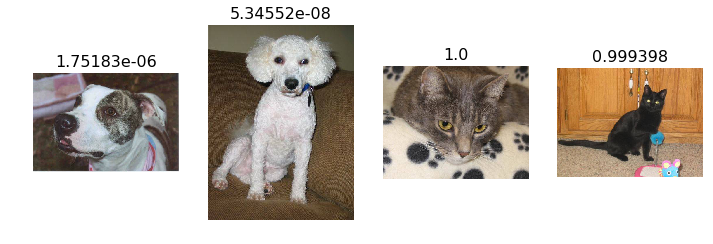

In [168]:
plots_idx(idx, probs[idx])

In [169]:
incorrect = np.where(preds != val_labels[:,1])[0]

In [170]:
idx = permutation(incorrect)[:n_view]

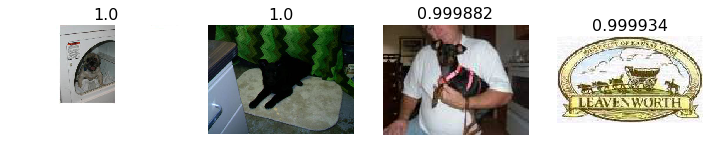

In [171]:
plots_idx(idx, probs[idx])

In [172]:
# most correct dogs
correctdogs = np.where((preds==1) & (preds==val_labels[:,1]))[0]
most_correct_dogs = np.argsort(probs[correctdogs])[:n_view]

In [173]:
most_correct_dogs

array([512, 194, 213,  17])

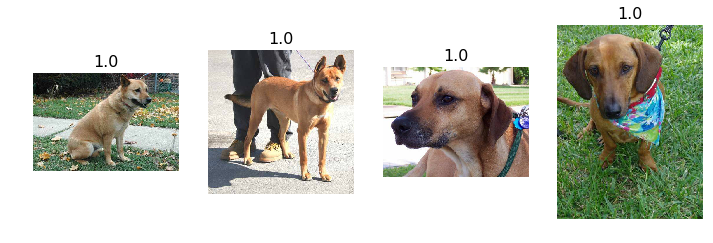

In [174]:
plots_idx(correctdogs[most_correct_dogs], 1 - probs[correctdogs][most_correct_dogs])

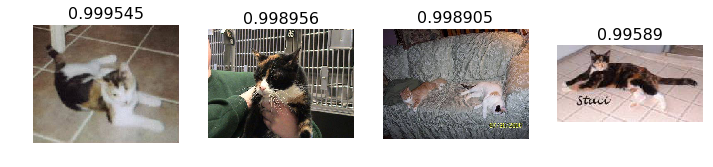

In [190]:
# situations where we *really* thought it was a dog, but it was actually a cat
incorrectdogs = np.where((preds==1) & (preds != val_labels[:,1]))[0]
# probs gives us the probability of it being a cat
# we sort in ascending order to find our strongest guesses of "dog"
# also, to get our probability estimate of it being a dog, we have to do 1 - probs later
prob_dogs = 1 - probs
most_incorrect_dogs = np.argsort(prob_dogs[incorrectdogs])[::-1][:n_view]
plots_idx(incorrectdogs[most_incorrect_dogs], 1 - probs[incorrectdogs][most_incorrect_dogs])

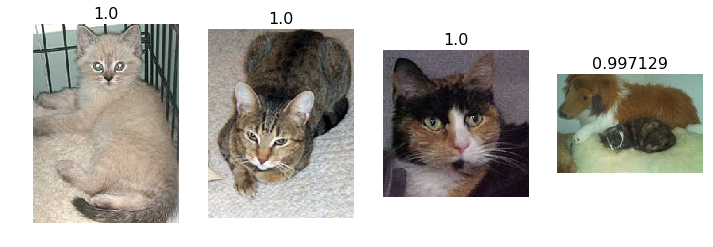

In [176]:
correctcats = np.where((preds == 0) & (preds == val_labels[:,1]))[0]
most_correct_cats = np.argsort(probs[correctcats][::-1])[:n_view]
plots_idx(correctcats[most_correct_cats], probs[correctcats][most_correct_cats])

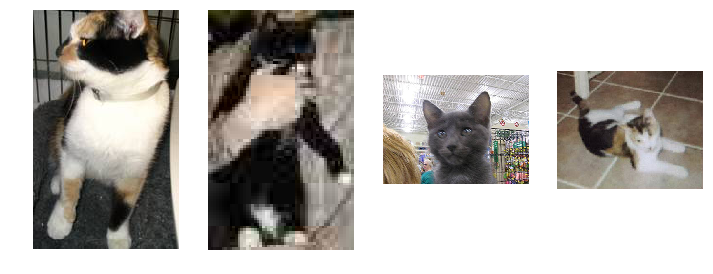

In [177]:
plots_idx(np.where(preds == 1)[0][:4])

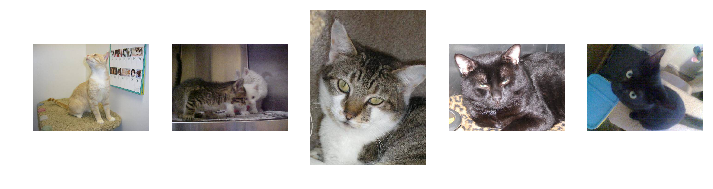

In [178]:
# to a quick check to ensure that when column 2 == 0, it's a cat
plots_idx(np.where(val_labels[:,1] == 0)[0][:5])

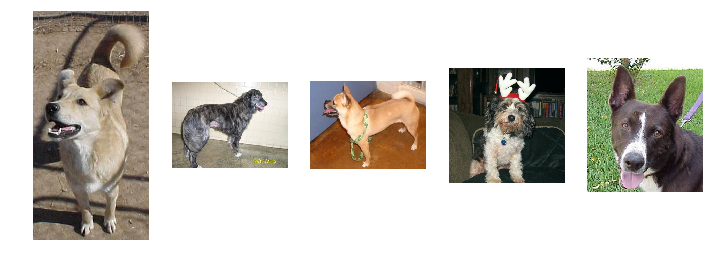

In [179]:
# to a quick check to ensure that when column 2 == 1, it's a dog
plots_idx(np.where(val_labels[:,1] == 1)[0][:5])

In [180]:
probs

array([  1.0000e+00,   1.0000e+00,   1.0000e+00, ...,   2.8722e-13,   2.1753e-06,   1.0146e-13], dtype=float32)

In [119]:
val_classes[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [136]:
g = [3, 2, 1]
h = [1, 50, 100]

In [141]:
np.argsort(g)

array([2, 1, 0])

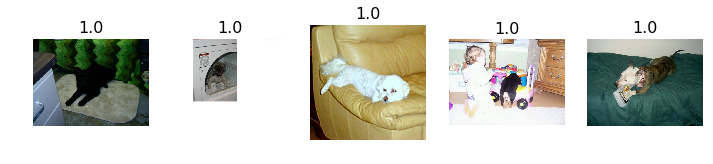

In [182]:
# we were really confident they were cats, but they didn't end up being cats
incorrect_cats = np.where((preds == 0) & (val_labels[:,1] != preds))[0]
most_incorrect_cats = np.argsort(probs[incorrect_cats])[::-1]
plots_idx(incorrect_cats[most_incorrect_cats][:5], probs[most_incorrect_cats])

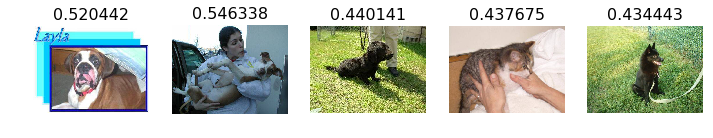

In [185]:
# really uncertain wtf they are
most_uncertain = np.argsort(abs(probs - 0.5))
plots_idx(most_uncertain[:5], probs[most_uncertain])

In [194]:
cm = confusion_matrix(val_classes, preds)

In [196]:
val_batches.class_indices

{'cats': 0, 'dogs': 1}

[[787  19]
 [ 24 761]]


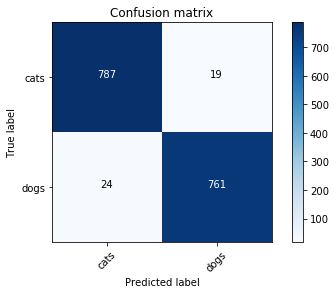

In [195]:
plot_confusion_matrix(cm, val_batches.class_indices)

In [197]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [198]:
model.pop()

In [199]:
for layer in model.layers: layer.trainable = False

In [200]:
model.add(Dense(2, activation='softmax', ))

In [201]:
??vgg.finetune

In [202]:
gen = image.ImageDataGenerator()

In [203]:
batches = gen.flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)

In [205]:
val_batches = gen.flow(val_data, val_labels, batch_size=batch_size, shuffle=False)

In [245]:
def fit_model(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, samples_per_epoch=trn_data.shape[0], nb_epoch=nb_epoch, 
                        validation_data=val_batches, nb_val_samples=val_data.shape[0])

In [246]:
opt = RMSprop(lr=.1)

In [247]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [248]:
fit_model(model, batches, val_batches, nb_epoch=2)

Epoch 1/2
4677/4677 [==============================] - 157s - loss: 1.2423 - acc: 0.9207 - val_loss: 0.5157 - val_acc: 0.9679.90 - ETA: 24s - loss: 1.42 - ETA: 19s - loss - ETA:  - ETA: 17s - loss:  - ETA: 16s - loss: 1.34 - ETA: 13 - ETA: 11s - lo - ETA: 10s - ETA: 8s - loss: 1.2979 - ETA:
Epoch 2/2
4677/4677 [==============================] - 158s - loss: 0.5984 - acc: 0.9622 - val_loss: 0.4705 - val_acc: 0.9698 ETA: 


In [249]:
model.save_weights(model_path+'finetune1.h5')

In [250]:
model.load_weights(model_path+'finetune1.h5')

In [251]:
model.evaluate(val_data, val_labels)

1591/1591 [==============================] - 38s    


[0.47051234518036106, 0.96983029556154532]

In [252]:
batch_size=64

In [254]:
preds = model.predict_classes(val_data, batch_size=batch_size)
probs = model.predict_proba(val_data, batch_size=batch_size)[:0]

1591/1591 [==============================] - 37s    


In [257]:
val_classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

[[793  13]
 [ 35 750]]


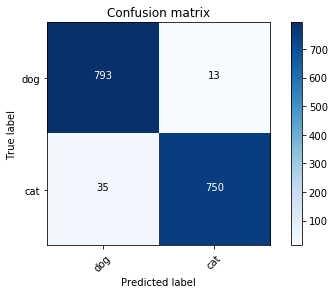

In [262]:
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, {'cat': 0, 'dog': 1})

In [263]:
layers = model.layers
first_dense_index = [index for index, layer in enumerate(layers) if type(layer) is Dense][0]
for layer in layers[first_dense_index:]: layer.trainable = True

In [264]:
K.set_value(opt.lr, 0.01)

In [265]:
fit_model(model, batches, val_batches, 3)

Epoch 1/3
4677/4677 [==============================] - 157s - loss: 0.5330 - acc: 0.9664 - val_loss: 0.4345 - val_acc: 0.9723 7s - loss - ETA: 5s - loss: 0.5201 - - ETA: 4s - loss: 0.5145  - ETA: 3s - loss: 0.5122 - acc: 0 - ETA: 2s - 
Epoch 2/3
4677/4677 [==============================] - 157s - loss: 0.4931 - acc: 0.9688 - val_loss: 0.3934 - val_acc: 0.97499 - ETA: 1s - loss: 0.4
Epoch 3/3
4677/4677 [==============================] - 158s - loss: 0.4847 - acc: 0.9690 - val_loss: 0.3801 - val_acc: 0.9755


In [267]:
model.save_weights(model_path+'finetune2.h5')

In [268]:
for layer in layers: layer.trainable = True

In [269]:
K.set_value(opt.lr, 0.001)

In [270]:
fit_model(model, batches, val_batches, 4)

Epoch 1/4
4677/4677 [==============================] - 157s - loss: 0.5079 - acc: 0.9671 - val_loss: 0.3750 - val_acc: 0.9755
Epoch 2/4
4677/4677 [==============================] - 157s - loss: 0.4712 - acc: 0.9696 - val_loss: 0.3797 - val_acc: 0.9749
Epoch 3/4
4677/4677 [==============================] - 159s - loss: 0.4521 - acc: 0.9711 - val_loss: 0.3806 - val_acc: 0.9742
Epoch 4/4
4677/4677 [==============================] - 160s - loss: 0.4602 - acc: 0.9711 - val_loss: 0.3791 - val_acc: 0.9742
